In [174]:
import torch
import cv2
import numpy
from PIL import Image

In [175]:
def model_load(yolov5_path,model_path,chosse_classes):
    model = torch.hub.load(yolov5_path, 'custom',model_path, source='local',force_reload=True)
    model.classes = chosse_classes # class ='plate'
    return model

In [176]:
def inference(img_path,model):
    img = Image.open(img_path)
    img = img.rotate(0, expand=True) 
    results = model(img,size=80)
    results.show()
    print(results.pandas().xyxy[0].sort_values(by="xmin",ascending=True))

import model


YOLOv5  v7.0-105-g226a5e4 Python-3.10.8 torch-2.0.0.dev20230219+cu118 CUDA:0 (Quadro M1000M, 2048MiB)

Fusing layers... 
Model summary: 212 layers, 21002451 parameters, 0 gradients
Adding AutoShape... 


start inference


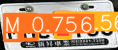

        xmin       ymin       xmax       ymax  confidence  class name
0   4.181471  14.891733  22.172138  40.330631    0.749415     22    M
3  18.404961  14.593350  37.603001  39.289845    0.271071     23    N
1  19.178873  14.839410  36.675217  39.860592    0.656598     22    M
4  54.501152  12.725340  68.665558  34.489258    0.255044      0    -
2  55.761131  12.310790  70.687088  37.506908    0.562020      3    2


In [177]:
def main():
    yolov5_path = r'C:\Users\ansel_chen\VScode_Ansel\pytorch_practice\yolov5'
    model_path = r'C:\Users\ansel_chen\VScode_Ansel\pytorch_practice\model\moto.pt'
    chosse_classes = [i for i in range(35)]
    img_path = r'C:\Users\ansel_chen\VScode_Ansel\pytorch_practice\torch_crop\test\plate1.jpg'
    
    try:
        print('import model')
        model = model_load(yolov5_path,model_path,chosse_classes)
    except:
        print('import model fail')

    try:
        print('start inference')
        inference(img_path,model)

    except:
        print('inference error')

if __name__ == '__main__':
    main()